In [1]:
from bs4 import BeautifulSoup
import pandas as pd  
import os
import numpy as np

**Парсер страниц с хабра***

In [2]:
# Получаем текущую рабочую директорию
current_directory = os.getcwd()

# Имя подпапки, которую вы ищете
folder_name = "data"

# Создаем путь к целевой папке
folder_path = os.path.join(current_directory, folder_name)

data_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.html'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        soup = BeautifulSoup(file_content, 'html.parser')

        rating = soup.find('span', {'class': 'tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating'})
        company = soup.find('a', {'class': 'tm-company-card__name'})
        titles = soup.find_all('a', {'class': 'tm-title__link'})
        articles = soup.find_all('div', {'class': 'article-formatted-body'})
        votes = soup.find_all('span', {'class': 'tm-votes-meter__value'})
        views = soup.find_all('span', {'class': 'tm-icon-counter__value'})
        comments = soup.find_all('span', {'class': 'bookmarks-button__counter'})
        
        rating_text = rating.get_text().strip()
        company_text = company.get_text().strip()
        titles_text = [link.get_text().strip() for link in titles]
        articles_text = [link.get_text().strip() for link in articles]
        votes_text = [link.get_text().strip() for link in votes]
        views_text = [link.get_text().strip() for link in views]
        comments_text = [link.get_text().strip() for link in comments]

        rating_values = [rating_text] * len(votes_text)
        company_values = [company_text] * len(votes_text)

        elements_dict = {
            'rating': rating_values,
            'company': company_values,
            'titles': titles_text,
            'articles': articles_text,
            'votes': votes_text,
            'views': views_text,
            'comments': comments_text,
        }

        data_list.append(elements_dict)

df = pd.DataFrame(data_list)
df = df.apply(lambda col: col.explode()).reset_index(drop=True)
df

,rating,company,titles,articles,votes,views,comments
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",-6,702,3
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",-16,16K,25
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,+19,5.7K,74
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,+11,1.7K,12
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",+25,14K,82
...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",+17,7.6K,60
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",+5,935,2
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",+7,1.2K,11
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,+67,3.3K,15


**Функция для приведения столбца views в числовые значения, а также измененение типов данных для rating и comments**

**Изменяем тип также и для votes, плюсовые значения будут по дефолту, а минусовые будут стоять со знаком "-"**

In [3]:
def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)


df['views'] = df['views'].apply(convert_to_int)

df[['views', 'comments']] = df[['views', 'comments']].astype(int)
df[['rating']] = df[['rating']].astype(float)

df['votes'] = df['votes'].str.replace('[+,-]', '', regex=True)
df['votes'] = pd.to_numeric(df['votes'])

df

,rating,company,titles,articles,votes,views,comments
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82
...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,67,3300,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    220 non-null    float64
 1   company   220 non-null    object 
 2   titles    220 non-null    object 
 3   articles  220 non-null    object 
 4   votes     220 non-null    int64  
 5   views     220 non-null    int32  
 6   comments  220 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 10.4+ KB


**Создаем столбец целевой метки пока что заполненый нулями**

In [6]:
df['target'] = 0
df

,rating,company,titles,articles,votes,views,comments,target
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3,0
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25,0
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74,0
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12,0
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82,0
...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60,0
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2,0
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11,0
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,67,3300,15,0


**Далее находим индекс строки, подходящей по максимальным параметрам и меняем ей целевую метку с 0 на 1**

In [8]:
# находим строчку в макс значениями
max_row_index = (df['votes'] + df['rating']).idxmax()

# Заменяем значение в столбце на 1 для найденной строки
df.loc[max_row_index, 'target'] = 1
df


,rating,company,titles,articles,votes,views,comments,target
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3,0
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25,0
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74,0
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12,0
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82,0
...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60,0
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2,0
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11,0
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,67,3300,15,0


**Сохраняем датафрейм**

In [9]:
df.to_csv("output.csv", index=False)

**2 ЧАСТЬ. ПРЕДОБРАБОТКА**

In [12]:
data = pd.read_csv("output.csv")
data

,rating,company,titles,articles,votes,views,comments,target
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3,0
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25,0
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74,0
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12,0
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82,0
...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60,0
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2,0
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11,0
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,67,3300,15,0


**Установка необходимых библиотек**

In [15]:
%pip install re
%pip install nltk
%pip install unicodedata
%pip install contractions
%pip install inflect
%pip install emoji
%pip install pymorphy2
%pip install seaborn

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for inflect from https://files.pythonhosted.org/packages/fb/c6/d9feb758be584f729424390af24687d3a4363d968164f94079f83cd536b4/inflect-7.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.
Note: you may ne

In [13]:
import re
import nltk
import emoji
import unicodedata
# import contractions
# import inflect
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy2 import MorphAnalyzer
import string

nltk.download('stopwords')
nltk.download('punkt', quiet=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# morph = MorphAnalyzer()
# stop_words = set(stopwords.words('russian'))

# # Функция для токенизации, лемматизации и удаления стоп-слов
# def preprocess_text(text):
#     #удаление эмоджи
#     text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

#     # Токенизация
#     tokens = word_tokenize(text)
    
#     numbers = [i for i in range(10)]
#     numbers = list(map(str, numbers))
    
# #     text = re.sub(r'[^\w\s]', '', text)
#     text = [word.lower() for word in word_tokenize(text) if re.match(r'\w', word)]

#     # Лемматизация
#     lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    
#     # Удаление стоп-слов и пунктуации
#     filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words and token not in string.punctuation]
    
#     return ' '.join(filtered_tokens)

# data['processed_articles'] = data['articles'].apply(preprocess_text)
# data['processed_titles'] = data['titles'].apply(preprocess_text)

# print(data[['articles', 'processed_articles']].head())
# print(data[['titles', 'processed_titles']].head())

                                            articles  \
0  Алгоритм Шора позволит квантовым компьютерам б...   
1  23 ноября 2023 года было знаменательное событи...   
2  Не так давно вышло обновление macOS 14 Sonoma....   
3  Привет, Хабр. Это вторая статья в цикле, в кот...   
4  Приветствую, и снова я начну с вопроса. И дост...   

                                  processed_articles  
0  алгоритм шор позволить квантовый компьютер буд...  
1  23 ноябрь 2023 год знаменательный событие весь...  
2  давно выйти обновление macos 14 sonoma некотор...  
3  привет хабра это второй статья цикл который ра...  
4  приветствовать снова начать вопрос достаточно ...  
                                              titles  \
0  Тридцать лет спустя: увеличение скорости квант...   
1  К 60-летию «Доктора Кто»: как появился культов...   
2  Macintosh 128K: от мечты к легенде в мире комп...   
3  Архитектурные нюансы OpenStack. Базы данных ка...   
4  Как вредоносы распространялись через поддельны... 

In [14]:
df_idf = data.copy()


In [15]:
df_idf

,rating,company,titles,articles,votes,views,comments,target
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3,0
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25,0
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74,0
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12,0
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82,0
...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60,0
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2,0
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11,0
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,67,3300,15,0


**Препроцессинг и векторизация текста с помощью word2vec**

In [17]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    stop_words = set(stopwords.words('russian'))
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

df_idf['processed_articles'] = df_idf['articles'].apply(preprocess_text)
df_idf['processed_titles'] = df_idf['titles'].apply(preprocess_text)

df_idf['combined_text'] = df_idf['processed_articles'].apply(lambda x: ' '.join(x)) + ' ' + df_idf['processed_titles'].apply(lambda x: ' '.join(x))

# Обучение Word2Vec
combined_text = df_idf['combined_text'].apply(preprocess_text)
word2vec_model = Word2Vec(sentences=combined_text, vector_size=100, window=5, min_count=1, workers=4)

# Функция для получения векторов слов в виде списка
def get_word_vectors(text, model):
    vectors = []
    for word in text:
        if word in model.wv:
            vectors.append(model.wv[word])
    return vectors

df_idf['vector_titles'] = df_idf['processed_titles'].apply(lambda x: get_word_vectors(x, word2vec_model))
df_idf['vector_articles'] = df_idf['processed_articles'].apply(lambda x: get_word_vectors(x, word2vec_model))

c:\Users\huawei\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.2.0)/charset_normalizer (2.0.0) doesn't match a supported version!
  warnings.warn(


In [18]:
df_idf.vector_titles[0]

[array([-0.00953694,  0.00119221, -0.00998438,  0.00175197, -0.00588862,
         0.00895427,  0.00678657, -0.00186883,  0.00670353,  0.00682176,
        -0.00949431, -0.0082273 , -0.00696596,  0.00375565, -0.00796121,
        -0.00500797,  0.00344408, -0.01004974,  0.00386132, -0.00067099,
        -0.00171657, -0.00943873,  0.00565246, -0.00738299,  0.00956487,
         0.00678974, -0.00806493, -0.00326466,  0.00770894,  0.00574679,
        -0.00196741, -0.00195685,  0.0075831 ,  0.00791663,  0.00664698,
        -0.00655393,  0.00089673,  0.00459206, -0.00562451, -0.00894914,
         0.00763892,  0.00613641, -0.0071852 ,  0.00345418,  0.00563042,
         0.00464405,  0.00239283, -0.00193661, -0.00012931,  0.00669836,
         0.00410678,  0.00936853,  0.00723277,  0.00617672,  0.00356367,
        -0.00093761, -0.00192564,  0.00477979, -0.01001508, -0.00558304,
        -0.00983139,  0.00452368, -0.00936533,  0.00185988,  0.00511003,
        -0.00315214,  0.00677225,  0.00396373, -0.0

**Нормализация векторов с помощью MinMaxScaler**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Объединение всех векторов слов в один массив
all_vectors = df_idf['vector_titles'].sum() + df_idf['vector_articles'].sum()

# Преобразование списка в массив numpy
all_vectors_array = np.array(all_vectors)

# Создание экземпляра MinMaxScaler
min_max_scaler = MinMaxScaler()

# Применение Min-Max Scaling к векторам
min_max_scaled_vectors = min_max_scaler.fit_transform(all_vectors_array)

df_idf['vector_titles_minmax'] = df_idf['vector_titles'].apply(lambda x: min_max_scaler.transform(np.array(x)))
df_idf['vector_articles_minmax'] = df_idf['vector_articles'].apply(lambda x: min_max_scaler.transform(np.array(x)))
df_idf

,rating,company,titles,articles,votes,views,comments,target,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3,0,"[криптовалюты, пока, захватили, мир, мозг, нач...","[место, крипты, реальном, мире, придёт, веб, з...",криптовалюты пока захватили мир мозг начинает ...,"[[-0.009536942, 0.0011922107, -0.009984382, 0....","[[-0.0030911095, 0.0049497196, -0.008778475, -...","[[0.05031252, 0.52993476, 0.00096580386, 0.576...","[[0.3609482, 0.7079602, 0.05978805, 0.1433906,..."
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25,0,"[привет, читатель, хотел, поделиться, историей...","[22, года, получил, лычку, senior]",привет читатель хотел поделиться историей приш...,"[[0.004358346, -0.0027550186, 0.008655885, 0.0...","[[-0.010580949, 0.0106664635, -6.673482e-05, -...","[[0.7199502, 0.34292072, 0.91020834, 0.7784548...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78..."
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74,0,"[новый, год, женой, пересматриваем, одну, попу...","[практическая, магия, istio, построении, архит...",новый год женой пересматриваем одну популярную...,"[[0.0051831636, 0.002837973, -0.0047637755, -0...","[[0.00539162, -0.008770479, 0.0071371133, -0.0...","[[0.7596996, 0.60790867, 0.2556187, 0.14995149...","[[0.76974547, 0.05791685, 0.836125, 0.43806112..."
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12,0,"[привет, лёша, cейчас, руковожу, командами, эм...","[эмоциоанльный, дизайн]",привет лёша cейчас руковожу командами эмоциона...,"[[0.008698566, 0.0014630572, 0.009624792, -0.0...","[[-0.010580949, 0.0106664635, -6.673482e-05, -...","[[0.9291128, 0.5427671, 0.95747006, 0.4084956,...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78..."
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82,0,"[зовут, константин, последние, 6, лет, професс...","[делал, развивал, карьеру, бэкенд, разработчика]",зовут константин последние 6 лет профессиональ...,"[[-0.00780533, -0.004174543, -0.007406204, 0.0...","[[-0.008784756, 0.0033671227, -0.0077994326, -...","[[0.13376182, 0.2756657, 0.12672526, 0.7256666...","[[0.08656162, 0.63297904, 0.107544184, 0.38812..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60,0,"[хабр, привет, саша, product, manager, ozon, х...","[создание, карты, зависимостей, увидеть, систе...",хабр привет саша product manager ozon хочу сег...,"[[-0.0012191451, -0.0070079975, 0.0068076598, ...","[[-0.008476823, 0.00613245, 0.0022904503, 0.00...","[[0.45116135, 0.14142069, 0.8200548, 0.8590728...","[[0.10140145, 0.76399624, 0.59971255, 0.892079..."
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2,0,"[привет, зовут, дима, руководитель, группы, ра...","[приглашаем, ozon, tech, community, qa, meetup]",привет зовут дима руководитель группы разработ...,"[[-0.0025668747, 0.009331504, 0.0047814916, -0...","[[-0.010580949, 0.0106664635, -6.673482e-05, -...","[[0.38621196, 0.91556287, 0.72122157, 0.282238...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78..."
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11,0,"[всем, привет, влад, руководитель, группы, пои...","[приглашаем, ozon, tech, community, go, meetup]",всем привет влад руководитель группы поисковой...,"[[-0.0025668747, 0.009331504, 0.0047814916, -0...","[[0.0044710566, 0.011

In [20]:
df_idf.vector_titles_minmax[0]

array([[5.03125191e-02, 5.29934764e-01, 9.65803862e-04, 5.76663375e-01,
        2.03970015e-01, 9.52027321e-01, 8.03469956e-01, 3.43711942e-01,
        8.39080930e-01, 8.43248129e-01, 3.65366340e-02, 1.46854818e-01,
        1.55489326e-01, 6.55370891e-01, 1.00139499e-01, 2.75833398e-01,
        6.65678322e-01, 6.36631548e-02, 6.91956043e-01, 5.48247397e-01,
        4.03492332e-01, 2.78789997e-02, 7.35499859e-01, 1.47082865e-01,
        9.69194472e-01, 8.34816754e-01, 1.24500841e-01, 3.52362394e-01,
        8.83735061e-01, 7.87769318e-01, 3.74628246e-01, 4.03115809e-01,
        8.73869717e-01, 8.99641991e-01, 8.33191752e-01, 1.64606303e-01,
        5.10685205e-01, 7.31050134e-01, 2.53259361e-01, 1.27515018e-01,
        8.76711667e-01, 8.12406659e-01, 1.64945304e-01, 6.74106240e-01,
        7.77335525e-01, 7.39493191e-01, 6.34772599e-01, 3.91533017e-01,
        4.89002317e-01, 7.85584569e-01, 7.00071871e-01, 9.68846202e-01,
        8.45393777e-01, 8.20090055e-01, 6.87043786e-01, 4.359598

**Поиск биграмм**

In [21]:
from nltk import FreqDist, bigrams
from sklearn.feature_extraction.text import CountVectorizer

# преобразование списков слов обратно в строки для CountVectorizer
df_idf['processed_articles'] = df_idf['processed_articles'].apply(lambda x: ' '.join(x))
df_idf['processed_titles'] = df_idf['processed_titles'].apply(lambda x: ' '.join(x))

df_idf['processed_titles']

0           место крипты реальном мире придёт веб завтра
1                           22 года получил лычку senior
2      практическая магия istio построении архитектур...
3                                   эмоциоанльный дизайн
4             делал развивал карьеру бэкенд разработчика
                             ...                        
215    создание карты зависимостей увидеть системный ...
216             приглашаем ozon tech community qa meetup
217             приглашаем ozon tech community go meetup
218                    видеоредактор работа видео canvas
219                   ускоряем поиск коду android studio
Name: processed_titles, Length: 220, dtype: object

In [22]:
# извлечение биграмм из столбцов 'processed_articles' и 'processed_titles'
vectorizer_articles = CountVectorizer(ngram_range=(2, 2))
vectorizer_titles = CountVectorizer(ngram_range=(2, 2))

In [23]:
# преобразование векторов биграмм в DataFrame
bi_articles = pd.DataFrame(vectorizer_articles.fit_transform(df_idf['processed_articles']).toarray(),
                           columns=vectorizer_articles.get_feature_names_out())

bi_titles = pd.DataFrame(vectorizer_titles.fit_transform(df_idf['processed_titles']).toarray(),
                         columns=vectorizer_titles.get_feature_names_out())

In [24]:
# расчет частоты биграмм
freq_bi_articles = bi_articles.sum().sort_values(ascending=False)
freq_bi_titles = bi_titles.sum().sort_values(ascending=False)


**Вывод топ10 биграмм для каждого столбца**

In [25]:
# Вывод наиболее часто встречающихся биграмм
print("Top 10 биграмм в статьях:")
print(freq_bi_articles.head(10))

print("\nTop 10 биграмм в заголовках:")
print(freq_bi_titles.head(10))

Top 10 биграмм в статьях:
привет зовут         25
привет хабр          18
статье расскажу      15
всем привет          14
yandex cloud         12
подробности катом    12
всё это              10
хочу поделиться       9
статье хочу           8
2023 года             8
dtype: int64

Top 10 биграмм в заголовках:
ozon tech                4
tech community           4
приглашаем ozon          3
легко построить          2
diplodoc открытый        2
почему инфраструктура    2
обычно состоит           2
ui легко                 2
apache spark             2
datalens опенсорсе       2
dtype: int64


**Поиск ключевых слов**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_combined = TfidfVectorizer()
tfidf_matrix_combined = vectorizer_combined.fit_transform(df_idf['combined_text'])

# получение списка ключевых слов
feature_names_combined = vectorizer_combined.get_feature_names_out()
max_tfidf_combined = tfidf_matrix_combined.max(axis=0).toarray()[0]
print(max_tfidf_combined)

[0.12052757 0.13013326 0.10628188 ... 0.1135209  0.06171422 0.11909797]


In [27]:
# сортировка ключевых слов
sorted_indices_combined = max_tfidf_combined.argsort()[::-1]
top_keywords_combined = [feature_names_combined[i] for i in sorted_indices_combined[:15]] # Top 15 ключевых слов
print(top_keywords_combined)

['junit', 'kubernetes', 'senior', 'selenoid', 'userver', 'трекер', 'битрикс24', 'движения', 'webassembly', 'субтитры', 'crm', 'ydb', 'автотестов', 'mysql', 'datalens']


**Разведочный анализ, визуализация**

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

C:\Users\huawei\AppData\Local\Temp\ipykernel_3988\2041203199.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='company', y='rating', data=df_idf, ci=None)


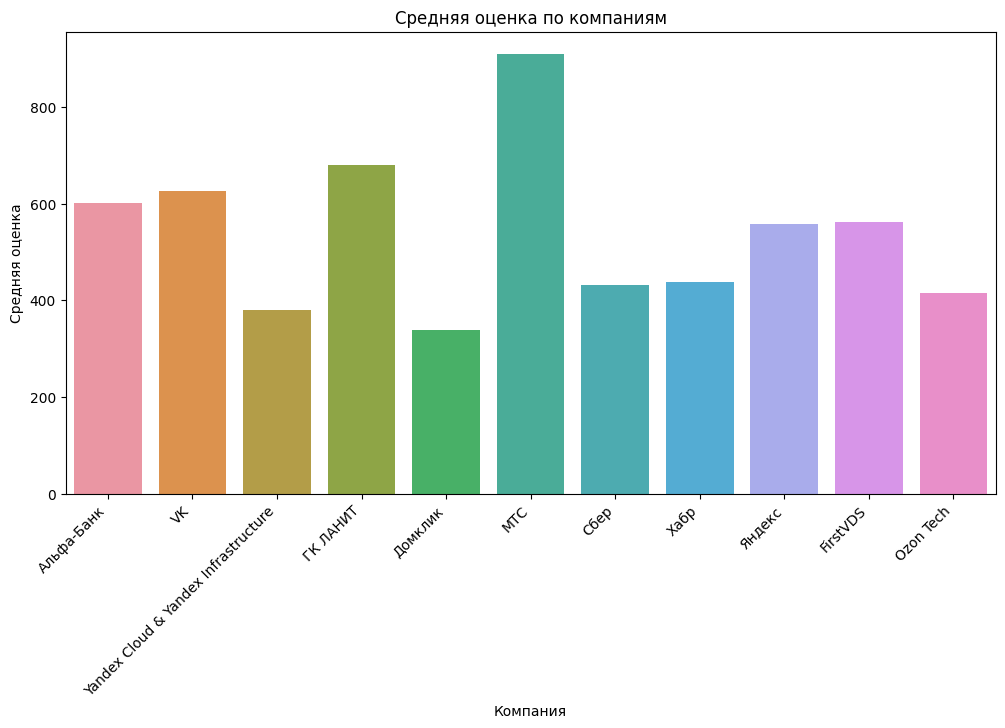

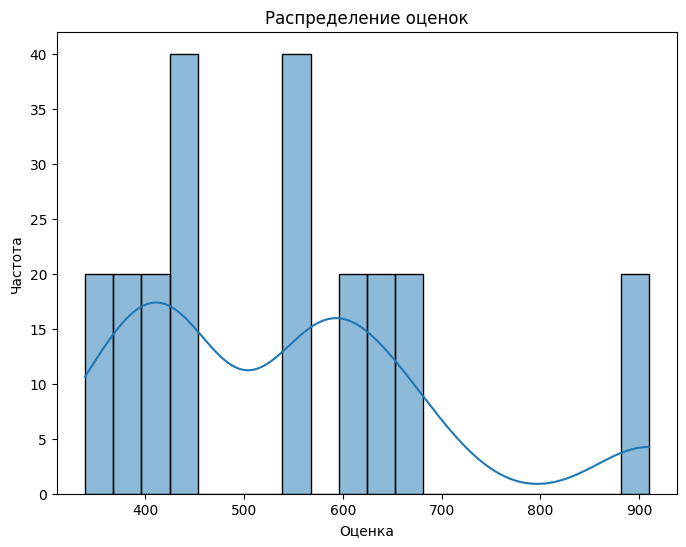

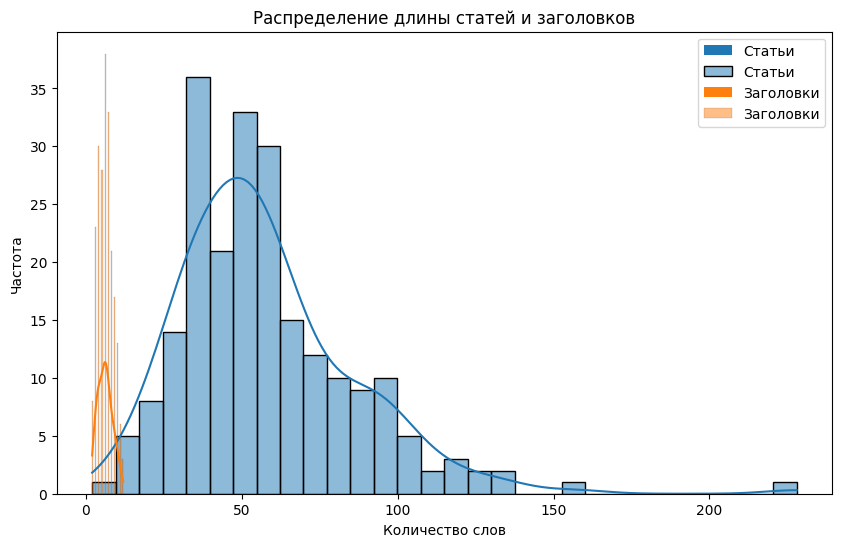

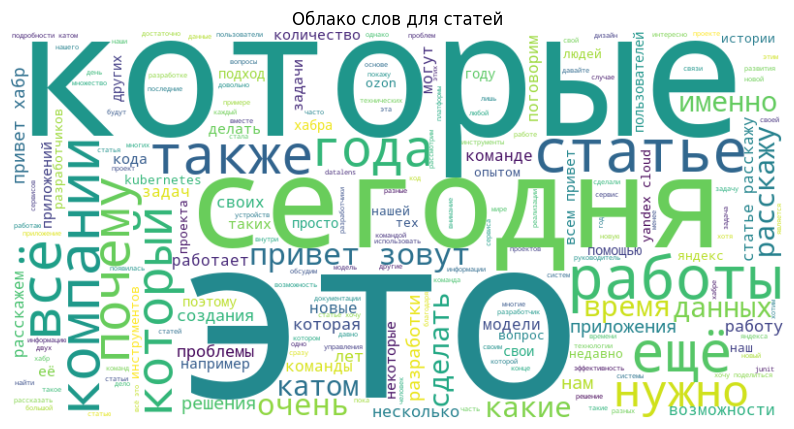

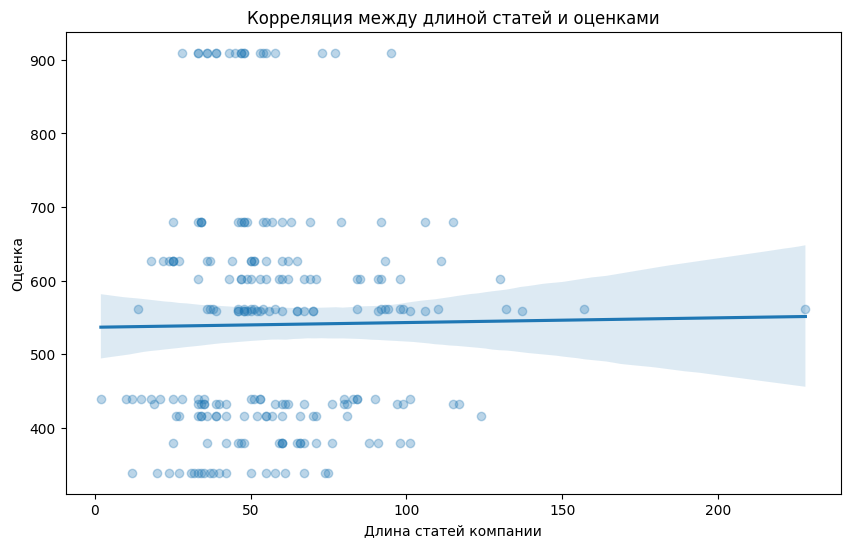

In [29]:
plt.rcParams['figure.figsize'] = (10, 6)

#   длины статей и заголовков
df_idf['article_length'] = df_idf['processed_articles'].apply(lambda x: len(x.split()))
df_idf['title_length'] = df_idf['processed_titles'].apply(lambda x: len(x.split()))

# Средняя оценка по компаниям
plt.figure(figsize=(12, 6))
sns.barplot(x='company', y='rating', data=df_idf, ci=None)
plt.title('Средняя оценка по компаниям')
plt.xlabel('Компания')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=45, ha='right')
plt.show()

# Распределение оценок
plt.figure(figsize=(8, 6))
sns.histplot(df_idf['rating'], bins=20, kde=True)
plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

# Распределение длины статей и заголовков
plt.figure()
sns.histplot(df_idf['article_length'], bins=30, kde=True, label='Статьи')
sns.histplot(df_idf['title_length'], bins=30, kde=True, label='Заголовки')
plt.title('Распределение длины статей и заголовков')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Облако слов для статей
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_idf['processed_articles'].explode()))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для статей')
plt.show()

# Корреляция между длиной статей и оценками
plt.figure(figsize=(10, 6))
sns.regplot(x='article_length', y='rating', data=df_idf, scatter_kws={'alpha':0.3})
plt.title('Корреляция между длиной статей и оценками')
plt.xlabel('Длина статей компании')
plt.ylabel('Оценка')
plt.show()


**Обучение моделей**

In [30]:
df = df_idf.copy()
df

,rating,company,titles,articles,votes,views,comments,target,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax,article_length,title_length
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3,0,криптовалюты пока захватили мир мозг начинает ...,место крипты реальном мире придёт веб завтра,криптовалюты пока захватили мир мозг начинает ...,"[[-0.009536942, 0.0011922107, -0.009984382, 0....","[[-0.0030911095, 0.0049497196, -0.008778475, -...","[[0.05031252, 0.52993476, 0.00096580386, 0.576...","[[0.3609482, 0.7079602, 0.05978805, 0.1433906,...",91,7
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25,0,привет читатель хотел поделиться историей приш...,22 года получил лычку senior,привет читатель хотел поделиться историей приш...,"[[0.004358346, -0.0027550186, 0.008655885, 0.0...","[[-0.010580949, 0.0106664635, -6.673482e-05, -...","[[0.7199502, 0.34292072, 0.91020834, 0.7784548...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78...",47,5
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74,0,новый год женой пересматриваем одну популярную...,практическая магия istio построении архитектур...,новый год женой пересматриваем одну популярную...,"[[0.0051831636, 0.002837973, -0.0047637755, -0...","[[0.00539162, -0.008770479, 0.0071371133, -0.0...","[[0.7596996, 0.60790867, 0.2556187, 0.14995149...","[[0.76974547, 0.05791685, 0.836125, 0.43806112...",98,11
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12,0,привет лёша cейчас руковожу командами эмоциона...,эмоциоанльный дизайн,привет лёша cейчас руковожу командами эмоциона...,"[[0.008698566, 0.0014630572, 0.009624792, -0.0...","[[-0.010580949, 0.0106664635, -6.673482e-05, -...","[[0.9291128, 0.5427671, 0.95747006, 0.4084956,...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78...",67,2
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82,0,зовут константин последние 6 лет профессиональ...,делал развивал карьеру бэкенд разработчика,зовут константин последние 6 лет профессиональ...,"[[-0.00780533, -0.004174543, -0.007406204, 0.0...","[[-0.008784756, 0.0033671227, -0.0077994326, -...","[[0.13376182, 0.2756657, 0.12672526, 0.7256666...","[[0.08656162, 0.63297904, 0.107544184, 0.38812...",92,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60,0,хабр привет саша product manager ozon хочу сег...,создание карты зависимостей увидеть системный ...,хабр привет саша product manager ozon хочу сег...,"[[-0.0012191451, -0.0070079975, 0.0068076598, ...","[[-0.008476823, 0.00613245, 0.0022904503, 0.00...","[[0.45116135, 0.14142069, 0.8200548, 0.8590728...","[[0.10140145, 0.76399624, 0.59971255, 0.892079...",124,7
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2,0,привет зовут дима руководитель группы разработ...,приглашаем ozon tech community qa meetup,привет зовут дима руководитель группы разработ...,"[[-0.0025668747, 0.009331504, 0.0047814916, -0...","[[-0.010580949, 0.0106664635, -6.673482e-05, -...","[[0.38621196, 0.91556287, 0.72122157, 0.282238...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78...",60,6
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11,0,всем привет влад руководитель группы поисковой...,приглашаем ozon tech community go meetup,всем привет влад руководитель группы поисковой...,"[[-0.0025668747, 0.009331504, 0.0047814916, -0...","[[0.0044710566

**Уберем некоторые ненужные для обучения столбцы**

In [31]:
columns_to_drop = ['titles', 'articles', 'processed_articles', 'processed_titles', 'combined_text', 'vector_titles', 'vector_articles', 'title_length', 'company']

df = df.drop(columns=columns_to_drop)
df

,rating,votes,views,comments,target,vector_titles_minmax,vector_articles_minmax,article_length
0,601.87,6,702,3,0,"[[0.05031252, 0.52993476, 0.00096580386, 0.576...","[[0.3609482, 0.7079602, 0.05978805, 0.1433906,...",91
1,601.87,16,16000,25,0,"[[0.7199502, 0.34292072, 0.91020834, 0.7784548...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78...",47
2,601.87,19,5700,74,0,"[[0.7596996, 0.60790867, 0.2556187, 0.14995149...","[[0.76974547, 0.05791685, 0.836125, 0.43806112...",98
3,601.87,11,1700,12,0,"[[0.9291128, 0.5427671, 0.95747006, 0.4084956,...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78...",67
4,601.87,25,14000,82,0,"[[0.13376182, 0.2756657, 0.12672526, 0.7256666...","[[0.08656162, 0.63297904, 0.107544184, 0.38812...",92
...,...,...,...,...,...,...,...,...
215,415.77,17,7600,60,0,"[[0.45116135, 0.14142069, 0.8200548, 0.8590728...","[[0.10140145, 0.76399624, 0.59971255, 0.892079...",124
216,415.77,5,935,2,0,"[[0.38621196, 0.91556287, 0.72122157, 0.282238...","[[0.0, 0.97881126, 0.48473284, 0.3621912, 0.78...",60
217,415.77,7,1200,11,0,"[[0.38621196, 0.91556287, 0.72122157, 0.282238...","[[0.7253819, 1.0, 0.1388062, 0.4743496, 0.2548...",70
218,415.77,67,3300,15,0,"[[0.42680466, 0.8514831, 0.053162485, 0.820662...","[[0.7223768, 0.4855621, 0.22790211, 0.5518459,...",36


In [32]:
columns_to_drop = ['vector_titles_minmax', 'vector_articles_minmax']

df = df.drop(columns=columns_to_drop)
df

,rating,votes,views,comments,target,article_length
0,601.87,6,702,3,0,91
1,601.87,16,16000,25,0,47
2,601.87,19,5700,74,0,98
3,601.87,11,1700,12,0,67
4,601.87,25,14000,82,0,92
...,...,...,...,...,...,...
215,415.77,17,7600,60,0,124
216,415.77,5,935,2,0,60
217,415.77,7,1200,11,0,70
218,415.77,67,3300,15,0,36


**Обучение SVM модели**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, log_loss, confusion_matrix
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.2,
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
df['comments'].unique()

array([  3,  25,  74,  12,  82,  13,  10,  16,  41,  34, 101,  28,  33,
        19,  11,  29,  39, 128,  38,  24,  96,  17,  30,  14,  76,   7,
        84,  51,  20,   2, 232,  32, 181,  35, 166,  59,   8,   5, 140,
        54,  23,  18,  27,  73,  49,   4, 178,   9, 345, 122, 222, 162,
        55,  69,  48,  71,  78,  42,  22,  56,  99,  31, 116,  15,   6,
        37,  26,  62,  36,  43,  58, 193,  40, 139,  45,  72,  47,  75,
        53, 255,  63,  44, 113,  93,  46, 187, 189,  61,  60], dtype=int64)

**Подбор гиперпараметров**

In [35]:
# Гиперпараметры для SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Гиперпараметры для Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

**Обучение модели SVM**

In [36]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

**Обучение модели RF**

In [37]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)
rf_model = rf_grid_search.best_estimator_

c:\Users\huawei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


**Оценка точности и вывод результатов**

In [39]:
# Получение предсказаний для SVM
svm_predictions = model.predict(X_test_scaled)

# Получение предсказаний для Random Forest
rf_predictions = rf_model.predict(X_test_scaled)


In [40]:
# Оценка точности модели
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [41]:
# Oценка точности модели
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# f1
svm_f1 = f1_score(y_test, svm_predictions, zero_division=1)
rf_f1 = f1_score(y_test, rf_predictions, zero_division=1)

# Recall
svm_recall = recall_score(y_test, svm_predictions, zero_division=1)
rf_recall = recall_score(y_test, rf_predictions, zero_division=1)

# Precision
svm_precision = precision_score(y_test, svm_predictions, zero_division=1)
rf_precision = precision_score(y_test, rf_predictions, zero_division=1)

# Log Loss
try:
    svm_log_loss = log_loss(y_test, svm_predictions)
except ValueError as e:
    print(f"Error calculating SVM Log Loss: {e}")
    svm_log_loss = None

try:
    rf_log_loss = log_loss(y_test, rf_predictions)
except ValueError as e:
    print(f"Error calculating RF Log Loss: {e}")
    rf_log_loss = None

# Матрица ошибок
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Вывод метрик
print(f'SVM Accuracy: {svm_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')

print(f'SVM F1 Score: {svm_f1}')
print(f'Random Forest F1 Score: {rf_f1}')

print(f'SVM Recall: {svm_recall}')
print(f'Random Forest Recall: {rf_recall}')

print(f'SVM Precision: {svm_precision}')
print(f'Random Forest Precision: {rf_precision}')

if svm_log_loss is not None:
    print(f'SVM Log Loss: {svm_log_loss}')
else:
    print("SVM Log Loss could not be calculated.")

if rf_log_loss is not None:
    print(f'Random Forest Log Loss: {rf_log_loss}')
else:
    print("Random Forest Log Loss could not be calculated.")

print(f'SVM Confusion Matrix:\n{svm_conf_matrix}')
print(f'Random Forest Confusion Matrix:\n{rf_conf_matrix}')


Error calculating SVM Log Loss: y_true contains only one label (0). Please provide the true labels explicitly through the labels argument.
Error calculating RF Log Loss: y_true contains only one label (0). Please provide the true labels explicitly through the labels argument.
SVM Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM F1 Score: 1.0
Random Forest F1 Score: 1.0
SVM Recall: 1.0
Random Forest Recall: 1.0
SVM Precision: 1.0
Random Forest Precision: 1.0
SVM Log Loss could not be calculated.
Random Forest Log Loss could not be calculated.
SVM Confusion Matrix:
[[44]]
Random Forest Confusion Matrix:
[[44]]


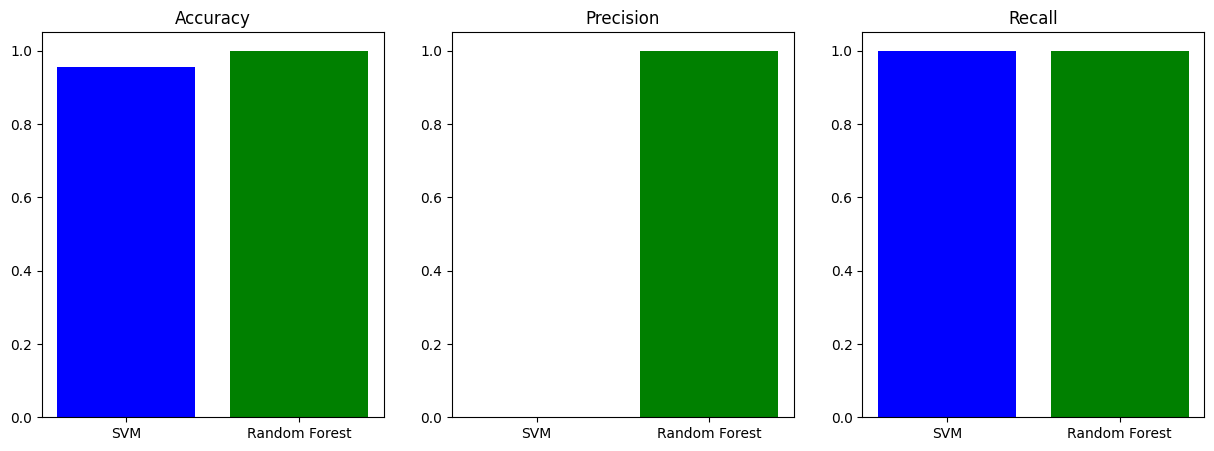

In [78]:
models = ['SVM', 'Random Forest']

# Метрики
accuracy_scores = [svm_accuracy, rf_accuracy]
precision_scores = [svm_precision, rf_precision]
recall_scores = [svm_recall, rf_recall]

# Построение графиков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# График Accuracy
axes[0].bar(models, accuracy_scores, color=['blue', 'green'])
axes[0].set_title('Accuracy')

# График Precision
axes[1].bar(models, precision_scores, color=['blue', 'green'])
axes[1].set_title('Precision')

# График Recall
axes[2].bar(models, recall_scores, color=['blue', 'green'])
axes[2].set_title('Recall')

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


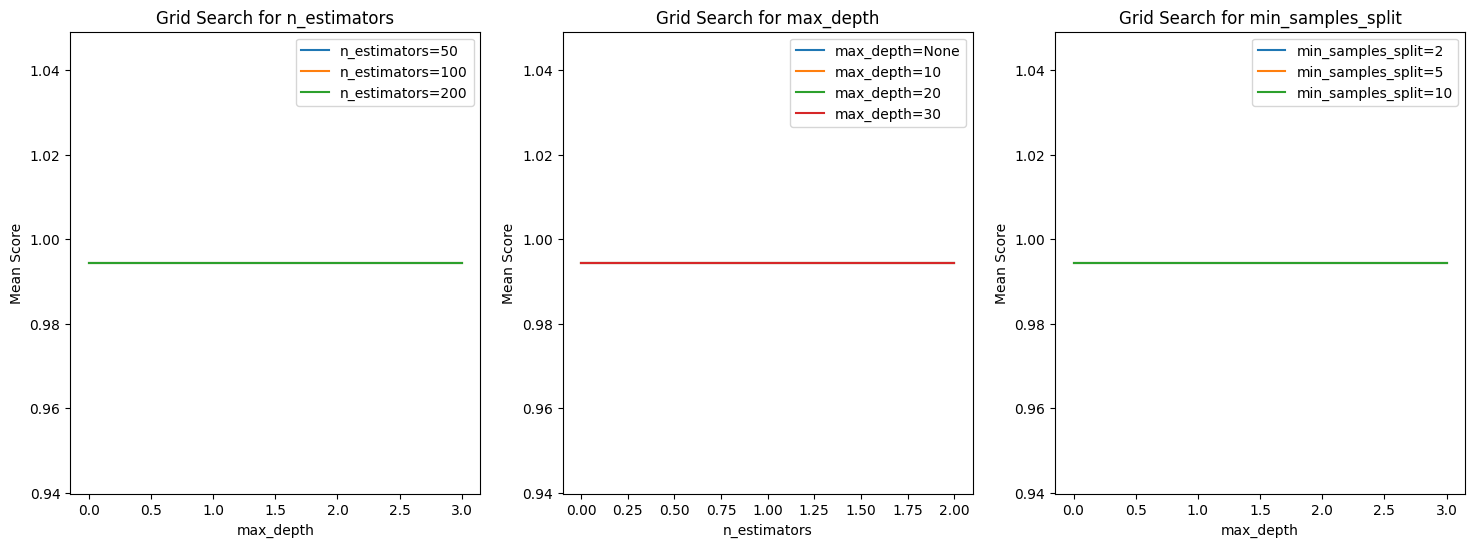

In [83]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)

# Извлекаем результаты из GridSearch
results = rf_grid_search.cv_results_
n_estimators = len(rf_param_grid['n_estimators'])
max_depth = len(rf_param_grid['max_depth'])
min_samples_split = len(rf_param_grid['min_samples_split'])
scores = np.array(results['mean_test_score']).reshape(n_estimators, max_depth, min_samples_split)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# График для 'n_estimators'
for i, value in enumerate(rf_param_grid['n_estimators']):
    ax[0].plot(range(max_depth), np.mean(scores[i, :, :], axis=1), label=f'n_estimators={value}')

# График для 'max_depth'
for i, value in enumerate(rf_param_grid['max_depth']):
    ax[1].plot(range(n_estimators), np.mean(scores[:, i, :], axis=1), label=f'max_depth={value}')

# График для 'min_samples_split'
for i, value in enumerate(rf_param_grid['min_samples_split']):
    ax[2].plot(range(max_depth), np.mean(scores[:, :, i], axis=0), label=f'min_samples_split={value}')

# Заголовки и подписи к осям
ax[0].set_title('Grid Search for n_estimators')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Mean Score')
ax[0].legend()

ax[1].set_title('Grid Search for max_depth')
ax[1].set_xlabel('n_estimators')
ax[1].set_ylabel('Mean Score')
ax[1].legend()

ax[2].set_title('Grid Search for min_samples_split')
ax[2].set_xlabel('max_depth')
ax[2].set_ylabel('Mean Score')
ax[2].legend()

plt.show()